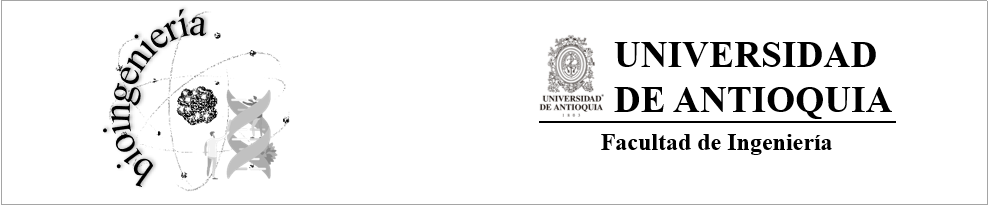

# Pesos (weigths) de la ANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import datasets

from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from keras.layers import Input, Dense
from keras.models import Model

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# Se convierte la lista de etiquetas a una matriz de clase binaria
y_trainOHE = to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]


# Esto retorna un tensor
inputs = Input(shape=(784,))

# Se llama a una capa con su entrada (tipo tensor), y retorna igualmente un tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# Aquí se crea el modelo que incluye las capas definidas
# La capa de entrada y tres capas densas
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

2025-05-22 13:05:26.779730: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-22 13:05:26.779758: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-22 13:05:26.779777: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-22 13:05:26.779988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-22 13:05:26.780002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-05-22 13:05:27.319860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3375/3375 - 33s - 10ms/step - accuracy: 0.8179 - loss: 0.5500 - val_accuracy: 0.8503 - val_loss: 0.4160
Epoch 2/10
3375/3375 - 31s - 9ms/step - accuracy: 0.8629 - loss: 0.3911 - val_accuracy: 0.8590 - val_loss: 0.3832
Epoch 3/10
3375/3375 - 29s - 9ms/step - accuracy: 0.8765 - loss: 0.3508 - val_accuracy: 0.8678 - val_loss: 0.3608
Epoch 4/10
3375/3375 - 30s - 9ms/step - accuracy: 0.8855 - loss: 0.3265 - val_accuracy: 0.8743 - val_loss: 0.3500
Epoch 5/10
3375/3375 - 30s - 9ms/step - accuracy: 0.8915 - loss: 0.3068 - val_accuracy: 0.8732 - val_loss: 0.3493
Epoch 6/10
3375/3375 - 29s - 9ms/step - accuracy: 0.8975 - loss: 0.2904 - val_accuracy: 0.8752 - val_loss: 0.3497
Epoch 7/10
3375/3375 - 29s - 9ms/step - accuracy: 0.9022 - loss: 0.2766 - val_accuracy: 0.8798 - val_loss: 0.3395
Epoch 8/10
3375/3375 - 29s - 9ms/step - accuracy: 0.9066 - loss: 0.2641 - val_accuracy: 0.8833 - val_loss: 0.3311
Epoch 9/10
3375/3375 - 29s - 9ms/step - accuracy: 0.9112 - loss: 0.2527 - val_accuracy: 0.8848 - v

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,652 (205.68 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.5 %


###  Visualizando los pesos de la red

In [4]:
model.get_weights()

[array([[ 0.02709082,  0.03180214, -0.02100185, ...,  0.08016869,
         -0.00104398,  0.00815849],
        [ 0.07202402,  0.01082652, -0.06838182, ..., -0.04751515,
         -0.01692557, -0.00375596],
        [ 0.07919271,  0.0518567 ,  0.01998457, ..., -0.06870136,
          0.0448724 , -0.04629808],
        ...,
        [-0.05862749,  0.05374189,  0.01275044, ...,  0.09693846,
          0.00013471,  0.02300358],
        [ 0.02679715,  0.01886384,  0.04470645, ..., -0.04491101,
          0.04329956,  0.00571313],
        [-0.05567772,  0.03338632,  0.04818618, ...,  0.09631421,
          0.00540539,  0.04811757]], dtype=float32),
 array([-0.08438203, -0.06949333,  0.07029957,  0.12245247,  0.00021734,
        -0.02876737, -0.00624547, -0.03909734, -0.03506236,  0.01936817,
         0.05690795, -0.01076773,  0.00283755,  0.02881151, -0.1848329 ,
         0.01521956, -0.05711303, -0.01028419, -0.05286744,  0.04297676,
         0.00278164,  0.05302525,  0.13511862, -0.07562074,  0.025

### Guardando los pesos de la red

In [7]:
path = 'models/'

In [8]:
model.save_weights(path + 'model.weights.h5')

### Creando modelo dos para la carga de los pesos

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model2 = Sequential()
model2.add(Dense(64, input_dim=input_dim))
model2.add(Activation('tanh'))
model2.add(Dense(32))
model2.add(Activation('tanh'))
model2.add(Dense(nb_classes, activation='softmax'))

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

### Cargando lo pesos en el nuevo modelo

In [11]:
model2.load_weights(path + "model.weights.h5")

Del modelo al que se le va a hacer la transferencia. Se debe construir el modelo con la misma arquitectura que en el que se hizo el entrenamiento?

### Evaluando la predicción del nuevo modelo

In [12]:
preds = model2.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.5 %


# Algunas arquitecturas de redes

## Autoencoder

Un autoencoder es una red neuronal que aprende a copiar su entrada a su salida. Tiene una capa interna (oculta) que describe un código utilizado para representar la entrada, y está constituida por dos partes principales: un codificador que mapea la entrada en el código y un decodificador que mapea el código a una reconstrucción de la entrada.
<br><br>


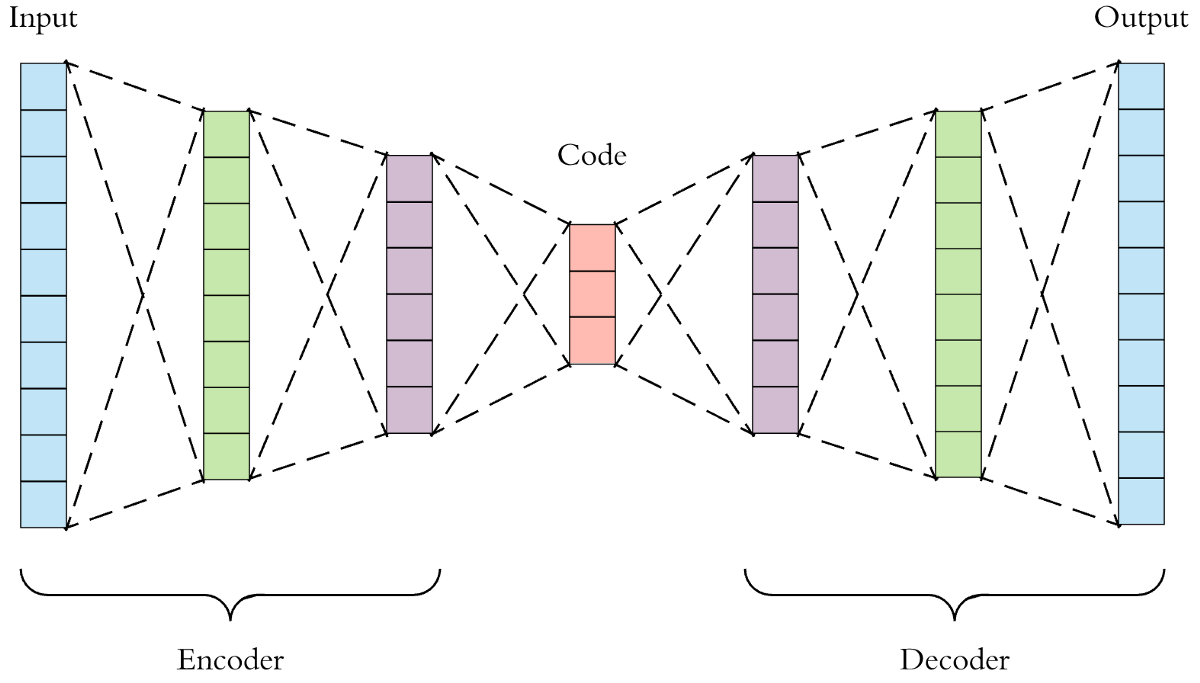

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mnist = pd.read_csv(path + "data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

In [ ]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [ ]:
input_dim=X.shape[1]
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(Dense(24, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(input_dim, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')
#model.reset_states()

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, X_train, epochs=100, batch_size=32)

### Mostrar reconstrucción en imágenes de prueba muestreadas

In [ ]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

In [ ]:
plt.figure(figsize=(17,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

# Autoencoder para eliminar ruido de imágenes

observar la reconstrucción cuando se alimenta con datos ruidosos

In [ ]:
def add_noise(x, noise_level=.2):
    return x + np.random.normal(size=x.shape)*noise_level

X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

In [ ]:

X_train_noisy = add_noise(X_train)

model.fit(X_train_noisy, X_train, epochs=100, batch_size=32 , verbose=2)

In [ ]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

# Arquitectura para información multimodal

Primero, hacemos el experimento con una Red Neuronal Clásica, como la que se ilustra a continuación



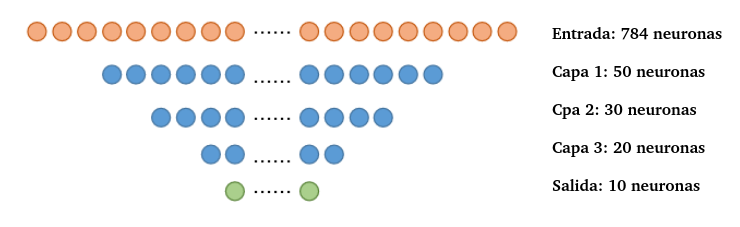

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [ ]:
mnist = pd.read_csv(path + "data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

In [ ]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [ ]:
yoh = np.eye(10)[y]
i = np.random.randint(len(y))
y[i], yoh[i]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

In [ ]:
model3 = Sequential()
model3.add(Dense(50, activation='relu', input_dim=X.shape[1]))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy')
#model3.reset_states()
model3.summary()

In [ ]:
model3.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

In [ ]:
plt.figure(figsize=(20,8))
loss  = model3.history.history["loss"]
vloss = model3.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

## Accuracy

In [ ]:
preds_train = model3.predict(X_train).argmax(axis=1)
preds_test = model3.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

# Red Multimodal

Para poder ejemplificar una Red Neuronal Multimodal, simularemos que tenemos información sobre nuestros datos de una fuente adicional. Este puede ser el caso cuando tenemos, por ejemplo, imágenes médicas y datos clínicos asociados. En esta situación tenemos datos multimodales (imágenes y numéricos).

Nos gustaría tener una arquitectura en la que podamos inyectar tanto imagen como datos numéricos.

En este caso, asumimos que tenemos una fuente de información adicional, que nos dice con un vector tamaño 2 si cada imagen contiene un número par o impar (con valores [1 0] o [0 1])

Esta nueva información se inyecta en LAYER 3 simplemente concatenando las neuronas



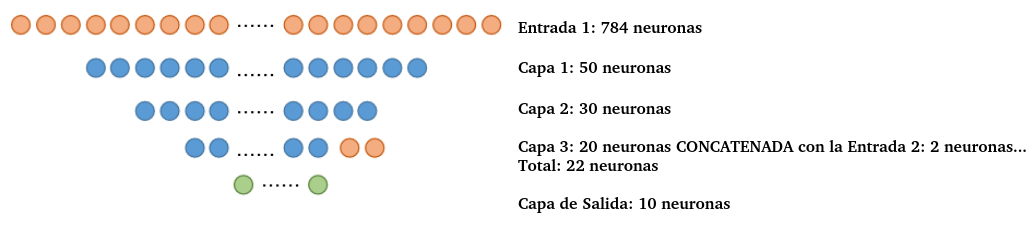

In [ ]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [ ]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

In [ ]:
clear_session()
input_dim = X.shape[1]
extra_info_dim=X_train_extra.shape[1]

inp1 = Input(shape=(input_dim,))
l11 = Dense(50, activation="relu")(inp1)
l12 = Dense(30, activation="relu")(l11)
l13 = Dense(20, activation="relu")(l12)

inp2 = Input(shape=(extra_info_dim,))
cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
output = Dense(10, activation='softmax')(cc1)
model4 = Model(inputs=[inp1, inp2], outputs=output)
model4.compile(optimizer='adam', loss='categorical_crossentropy')
#model4.reset_states()

model4.summary()

In [ ]:
model4.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32,
          validation_data=([X_test, X_test_extra], y_test_oh))

In [ ]:
plt.figure(figsize=(20,8))
loss  = model4.history.history["loss"]
vloss = model4.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

## Accuracy

In [ ]:
preds_train = model4.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model4.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))